In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statistics

In [2]:
data = pd.read_csv('/Users/tathagat/Desktop/Sem6/ML/ML_Assignment1/ionosphere_data_kaggle.csv')
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
label = 'label'
for i in range (len(data)):
    if data[label][i] == 'g':
        data[label][i] = 0
    else:
        data[label][i] = 1

<ipython-input-3-7f7f87704053>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[label][i] = 0
<ipython-input-3-7f7f87704053>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[label][i] = 1


In [4]:
train, test = train_test_split(data, test_size=0.1, random_state=None)
Y = train['label']
X = train.drop(['label'],axis=1)

In [5]:
train_stats = pd.DataFrame()
train_stats["var"] = X.var()
train_stats["mean"] = X.mean()
train_stats

,var,mean
feature1,0.096593,0.892063
feature2,0.000000,0.000000
feature3,0.248608,0.644622
feature4,0.184301,0.030105
feature5,0.255339,0.619660
feature6,0.204182,0.126124
feature7,0.244030,0.555696
feature8,0.260858,0.120301
feature9,0.245391,0.528264
feature10,0.235132,0.161108


In [6]:
train_stats = train_stats.sort_values(by=["var"],ascending=False)

In [7]:
train_stats.head(5)

,var,mean
feature15,0.422665,0.354364
feature13,0.384018,0.408317
feature17,0.379048,0.387054
feature21,0.375604,0.344979
feature19,0.375393,0.374506


array([[<AxesSubplot:title={'center':'var'}>]], dtype=object)

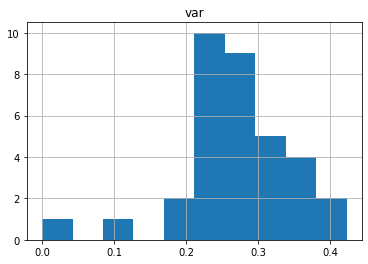

In [8]:
train_stats.hist(column=["var"])

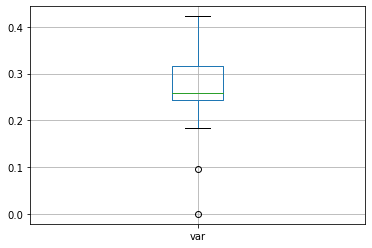

In [9]:
boxplot = train_stats.boxplot(column=["var"])